In [11]:
#Lets Grow More
#Rohit Deshmukh
#Second Internship Task
#Name of the task : Stock price prediction and forecasting using stacked LSTM








#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [12]:
import requests

download_url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
target_csv_path = "NSE-TATAGLOBAL.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [13]:
 dataset = pd.read_csv("NSE-TATAGLOBAL.csv",index_col='Date',parse_dates=True)

    

In [14]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [15]:
dataset.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [16]:
dataset.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


<AxesSubplot:xlabel='Date'>

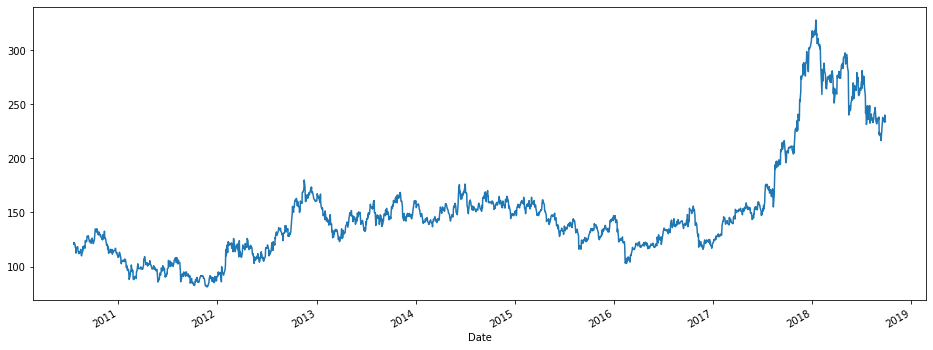

In [18]:
dataset['Open'].plot(figsize=(16,6))

In [19]:
# 7 Day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<AxesSubplot:xlabel='Date'>

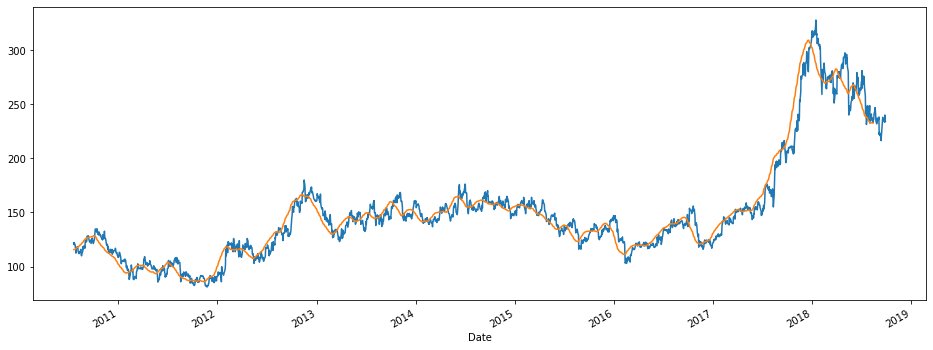

In [20]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window =30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

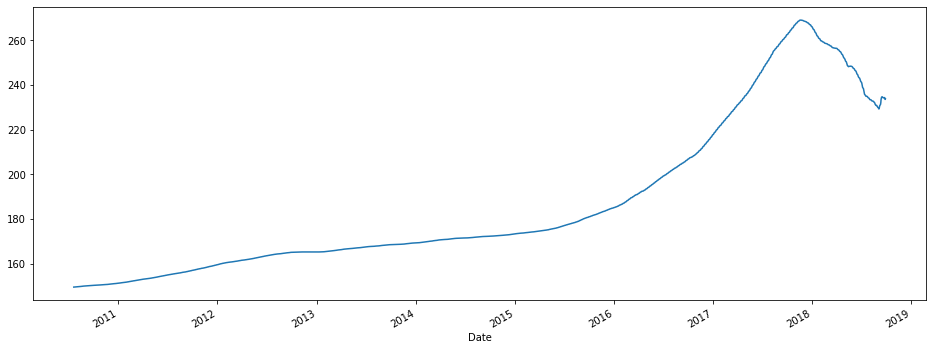

In [21]:
#Optional Specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [22]:
training_set = dataset['Open']
training_set =pd.DataFrame(training_set)

In [23]:
# Data cleaning
dataset.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [24]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
# Creating a datastructure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range (60,2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    

In [26]:
#Part 2 - Building the RNN

#importing the Keras Libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

In [27]:
#initialising the RNN
regressor = Sequential()


In [28]:
#Adding the first LSTM layer and same Dropout regularisation
#X_train, X_test = train_test_split(X,test_size=0.33, random_state=42)
regressor.add(LSTM(units =50, return_sequences = True, input_shape =(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#adding a second LSTM layer and same dropout regularisation
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#adding a third LSTM layer and same dropout regularisation
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#adding a fourth LSTM layer and same dropout regularisation
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

In [29]:
#Compiling the RNN
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

#Fitting the RNN to the Training Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 16s 127ms/step - loss: 0.0137
Epoch 2/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 8s 131ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 8s 125ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0021
Epoch 10/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 8s 127ms/step - loss: 0.0017
Epoch 13/100

In [30]:
#Making the predictions and visualizing the results

#Getting the real stock price of 2018
dataset_test =pd.read_csv("NSE-TATAGLOBAL.csv",index_col='Date',parse_dates=True)


In [31]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [32]:
dataset_test.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [33]:
test_set = dataset_test['Open']
test_set = pd.DataFrame(test_set)

In [34]:
#Getting the predicted stock prices of 2018
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total [len(dataset_total) - len(dataset_test['Open']) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append (inputs[i-60:i, 0])
X_test =np.array(X_test)
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\Subhash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


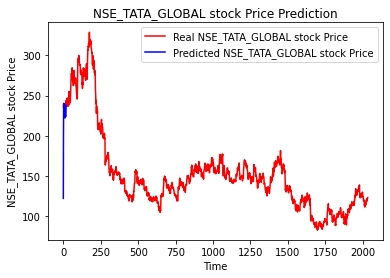

In [35]:
#Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real NSE_TATA_GLOBAL stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted NSE_TATA_GLOBAL stock Price')
plt.title('NSE_TATA_GLOBAL stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NSE_TATA_GLOBAL stock Price')
plt.legend()
plt.show()